In [1]:
import pandas as pd
train= pd.read_csv("train_data.csv",sep=";")
train.head(5)

,origin_latitude,origin_longitude,destination_latitude,destination_longitude,weight,loading_meters,is_adr,shipping_date,cost
0,27.22,105.59,26.91,108.67,0.513,0.195,True,2017-04-24,0.247
1,25.00,109.79,25.34,108.59,0.484,0.195,True,2017-07-27,0.248
2,27.10,105.60,29.35,106.54,0.484,0.195,True,2017-02-03,0.276
3,24.72,106.25,23.43,109.78,0.504,0.195,True,2017-04-03,0.276
4,22.33,108.37,29.38,111.50,0.484,0.195,True,2018-11-08,0.553


In [2]:
train.drop("shipping_date",axis=1,inplace=True)

In [3]:
train.head(3)

,origin_latitude,origin_longitude,destination_latitude,destination_longitude,weight,loading_meters,is_adr,cost
0,27.22,105.59,26.91,108.67,0.513,0.195,True,0.247
1,25.00,109.79,25.34,108.59,0.484,0.195,True,0.248
2,27.10,105.60,29.35,106.54,0.484,0.195,True,0.276


In [7]:
new_df = pd.get_dummies(train, columns=['is_adr'])

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251155 entries, 0 to 251154
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   origin_latitude        251155 non-null  float64
 1   origin_longitude       251155 non-null  float64
 2   destination_latitude   251155 non-null  float64
 3   destination_longitude  251155 non-null  float64
 4   weight                 251155 non-null  float64
 5   loading_meters         251155 non-null  float64
 6   is_adr                 251155 non-null  bool   
 7   cost                   251155 non-null  float64
dtypes: bool(1), float64(7)
memory usage: 13.7 MB


In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251155 entries, 0 to 251154
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   origin_latitude        251155 non-null  float64
 1   origin_longitude       251155 non-null  float64
 2   destination_latitude   251155 non-null  float64
 3   destination_longitude  251155 non-null  float64
 4   weight                 251155 non-null  float64
 5   loading_meters         251155 non-null  float64
 6   cost                   251155 non-null  float64
 7   is_adr_True            251155 non-null  uint8  
dtypes: float64(7), uint8(1)
memory usage: 13.7 MB


In [11]:
from sklearn.preprocessing import StandardScaler
cols_to_norm = ['origin_latitude','origin_longitude',"destination_latitude","destination_longitude"]
new_df[cols_to_norm] = StandardScaler().fit_transform(new_df[cols_to_norm])

In [12]:
new_df

,origin_latitude,origin_longitude,destination_latitude,destination_longitude,weight,loading_meters,cost,is_adr_True
0,0.853203,-1.600259,0.668718,-0.130163,0.513,0.195,0.247,1
1,-0.391300,0.412666,-0.122772,-0.164978,0.484,0.195,0.248,1
2,0.785932,-1.595466,1.898804,-1.057120,0.484,0.195,0.276,1
3,-0.548264,-1.283942,-1.085667,0.352900,0.504,0.195,0.276,1
4,-1.888067,-0.267894,1.913928,1.101429,0.484,0.195,0.553,1
...,...,...,...,...,...,...,...,...
251150,-0.312818,1.342446,0.260370,-0.970082,0.322,0.195,0.511,1
251151,-0.951887,0.906312,-0.304260,-1.992782,0.496,0.195,0.553,1
251152,0.701844,-1.633808,-0.465583,0.596607,0.495,0.215,0.436,1
251153,0.679421,-0.124114,0.865330,-1.727315,0.488,0.063,0.306,1


In [13]:
new_df.corr()

,origin_latitude,origin_longitude,destination_latitude,destination_longitude,weight,loading_meters,cost,is_adr_True
origin_latitude,1.000000,0.141741,0.027201,-0.012531,0.005787,-0.077565,0.035691,NaN
origin_longitude,0.141741,1.000000,0.097723,0.112161,-0.167042,-0.092156,0.001075,NaN
destination_latitude,0.027201,0.097723,1.000000,0.226907,-0.024997,0.045922,0.073673,NaN
destination_longitude,-0.012531,0.112161,0.226907,1.000000,0.014606,0.028057,0.040892,NaN
weight,0.005787,-0.167042,-0.024997,0.014606,1.000000,-0.282942,-0.051613,NaN
loading_meters,-0.077565,-0.092156,0.045922,0.028057,-0.282942,1.000000,0.048427,NaN
cost,0.035691,0.001075,0.073673,0.040892,-0.051613,0.048427,1.000000,NaN
is_adr_True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
X = new_df.loc[:, new_df.columns != 'cost']


In [30]:
X.head(3)

,origin_latitude,origin_longitude,destination_latitude,destination_longitude,weight,loading_meters,is_adr_True
0,0.853203,-1.600259,0.668718,-0.130163,0.513,0.195,1
1,-0.391300,0.412666,-0.122772,-0.164978,0.484,0.195,1
2,0.785932,-1.595466,1.898804,-1.057120,0.484,0.195,1


In [28]:
y = new_df.iloc[:,-2]

In [31]:
y.head(3)

0    0.247
1    0.248
2    0.276
Name: cost, dtype: float64

In [32]:
X.shape,y.shape

((251155, 7), (251155,))

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
X_train.head(3)

,origin_latitude,origin_longitude,destination_latitude,destination_longitude,weight,loading_meters,is_adr_True
192604,1.290460,1.907982,-1.010047,-0.095347,0.116,0.195,1
224624,-1.820796,-0.751955,2.135747,0.674942,0.289,0.195,1
46319,-1.310662,-0.301443,-1.120957,0.261510,0.484,0.195,1


In [36]:
y_train.head(3)

192604    0.514
224624    0.691
46319     0.248
Name: cost, dtype: float64

In [37]:
X_train.shape, y_train.shape,X_test.shape,y_test.shape

((168273, 7), (168273,), (82882, 7), (82882,))

In [38]:
import xgboost
reg = xgboost.XGBRegressor()
reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
y_predict = reg.predict(X_test)

In [40]:
len(y_predict)

82882

In [41]:
y_predict

array([0.44980147, 0.35991433, 0.5438993 , ..., 0.3742109 , 0.32893318,
       0.3613136 ], dtype=float32)

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [43]:
errors_1 = mean_squared_error(y_test, y_predict)
errors_2 = mean_absolute_error(y_test, y_predict)

In [44]:
errors_1

0.003036125348683548

In [45]:
errors_2

0.03467364537658488

In [46]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predict)
print(r2)

0.8189642742650559


In [61]:
from sklearn.ensemble import RandomForestRegressor
regressor_1 = RandomForestRegressor(n_estimators=1000)

In [62]:
regressor_1.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000)

In [63]:
y_predict_1 = regressor_1.predict(X_test)

In [64]:
errors_11 = mean_squared_error(y_test, y_predict_1)
errors_22 = mean_absolute_error(y_test, y_predict_1)

In [65]:
errors_11

0.003023547412761689

In [66]:
errors_22

0.03236327868000967

In [67]:
r2_1 = r2_score(y_test, y_predict_1)
print(r2_1)

0.8197142616655593


In [ ]:
fig, ax = plt.subplots(figsize=(14, 9))
ax.set_title('KNN Regression', fontsize=25)
ax.scatter(predicted,y_test,c="green")
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3)
ax.set_xlabel('Predicted CO$_2$ (g C ha$^{-1}$ day$^{-1}$)',fontsize=25)
ax.set_ylabel('Observed CO$_2$ (g C ha$^{-1}$ day$^{-1}$)',fontsize=25)
plt.xlim(0, 146000)
plt.ylim(0, 146000)


ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.tick_params(axis='both', which='major', labelsize=25)
plt.text(5000,125000, Metric,fontsize=24, bbox=dict(facecolor='none', alpha=0.2))
rc('axes', linewidth=1)
plt.show()

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

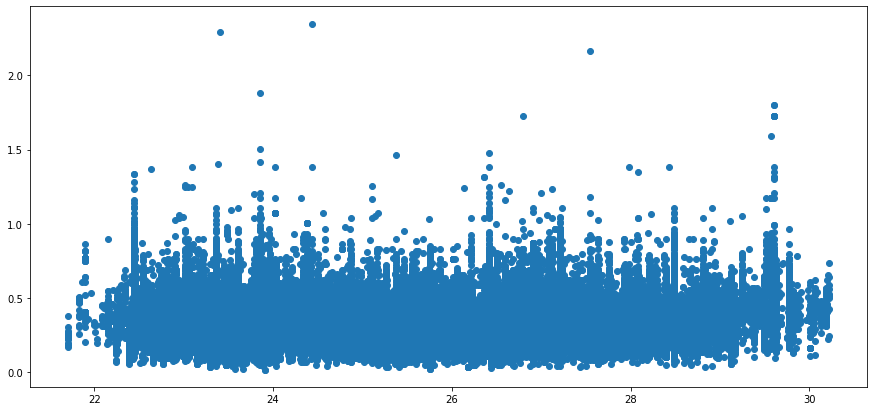

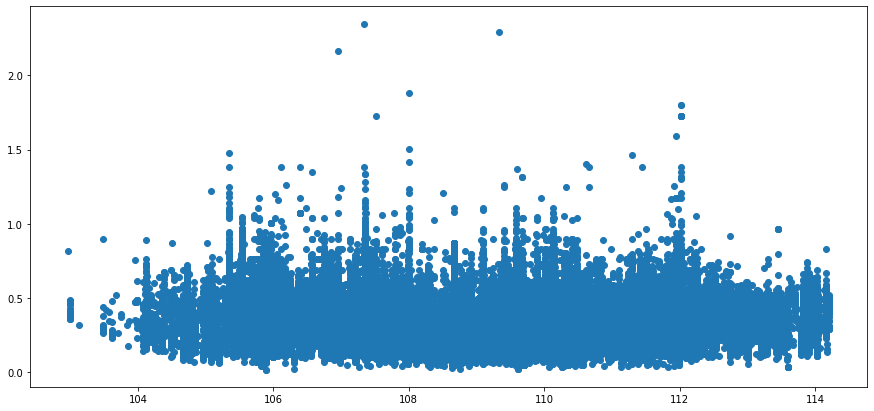

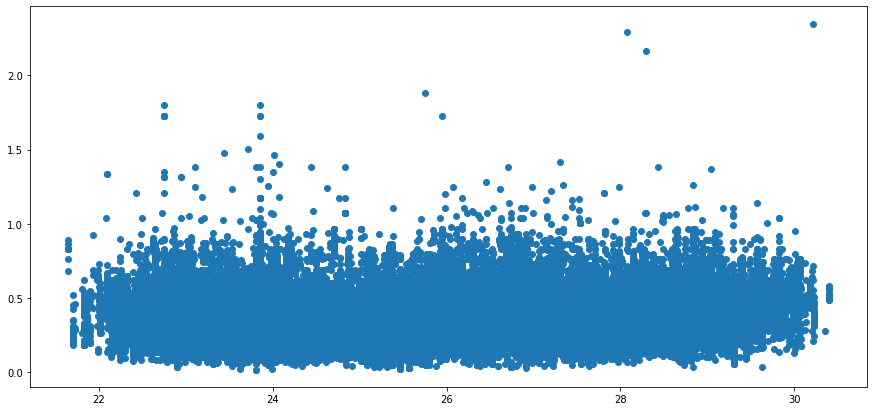

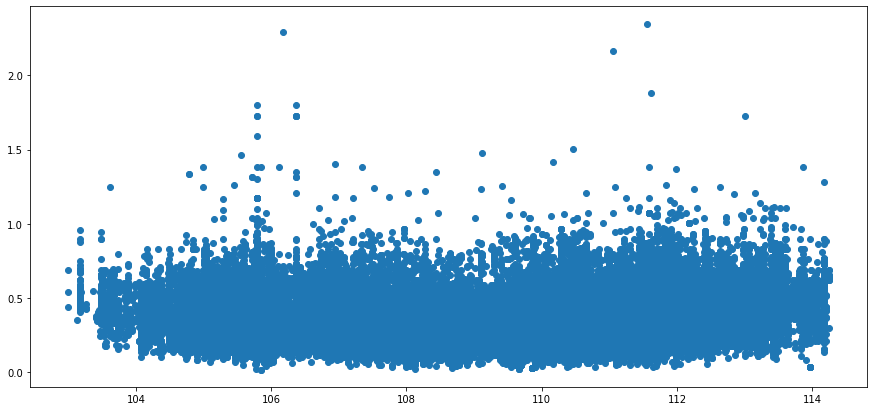

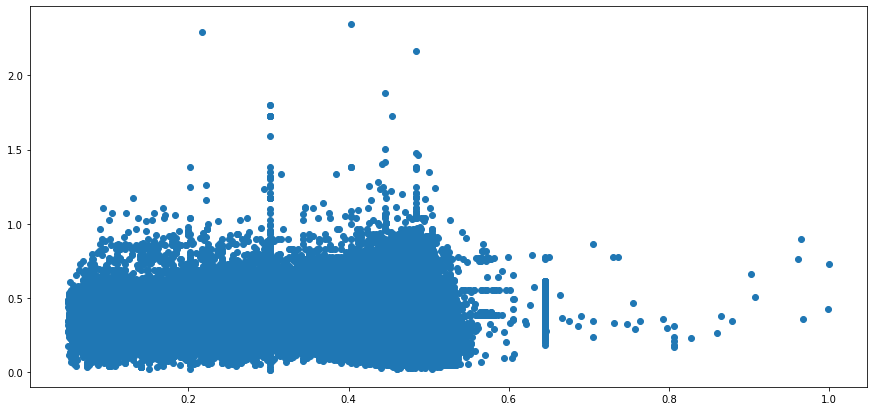

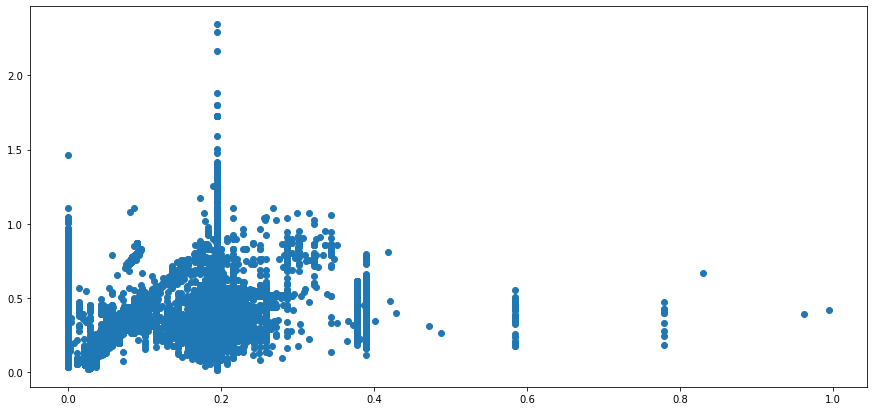

In [78]:

columns=["origin_latitude","origin_longitude","destination_latitude","destination_longitude","weight","loading_meters"]

for x in columns:
    plt.figure(figsize=(15,7))
    plt.scatter(train[x],train["cost"])
    plt.show()